In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-5
for g in gamma:
    print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          early_stop=3,
                          gamma=g)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search microsoft/deberta-base, lr: 1e-05 ,focal loss, gamma: 2


Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3412	Val Loss:	0.6547	Accuracy:	0.7352	F1:	0.6879
2 / 10: Train Loss:	0.3291	Val Loss:	0.6302	Accuracy:	0.7702	F1:	0.6675
3 / 10: Train Loss:	0.3052	Val Loss:	0.6368	Accuracy:	0.7002	F1:	0.6788
4 / 10: Train Loss:	0.2591	Val Loss:	0.5722	Accuracy:	0.7330	F1:	0.7041
5 / 10: Train Loss:	0.1999	Val Loss:	0.4963	Accuracy:	0.7746	F1:	0.7404
6 / 10: Train Loss:	0.1467	Val Loss:	0.4176	Accuracy:	0.7943	F1:	0.7550
7 / 10: Train Loss:	0.1002	Val Loss:	0.4032	Accuracy:	0.8118	F1:	0.7667
8 / 10: Train Loss:	0.0769	Val Loss:	0.4683	Accuracy:	0.7790	F1:	0.7490
9 / 10: Train Loss:	0.0556	Val Loss:	0.5982	Accuracy:	0.7177	F1:	0.6945
10 / 10: Train Loss:	0.0459	Val Loss:	0.3779	Accuracy:	0.8512	F1:	0.8109
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.70      0.75      0.72       119
      struct       0.91      0.89      0.90       338

    accuracy                           0.85       457
   macro avg      

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.0873	Val Loss:	0.7005	Accuracy:	0.2691	F1:	0.2197
2 / 10: Train Loss:	0.0813	Val Loss:	0.6667	Accuracy:	0.7287	F1:	0.6820
3 / 10: Train Loss:	0.0763	Val Loss:	0.6642	Accuracy:	0.7790	F1:	0.7212
4 / 10: Train Loss:	0.0726	Val Loss:	0.5660	Accuracy:	0.7505	F1:	0.7162
5 / 10: Train Loss:	0.0614	Val Loss:	0.5999	Accuracy:	0.7877	F1:	0.7399
6 / 10: Train Loss:	0.0567	Val Loss:	0.6375	Accuracy:	0.6740	F1:	0.6596
7 / 10: Train Loss:	0.0498	Val Loss:	0.5458	Accuracy:	0.8271	F1:	0.7820
8 / 10: Train Loss:	0.0420	Val Loss:	0.4945	Accuracy:	0.7921	F1:	0.7549
9 / 10: Train Loss:	0.0308	Val Loss:	0.4939	Accuracy:	0.7834	F1:	0.7504
10 / 10: Train Loss:	0.0216	Val Loss:	0.4522	Accuracy:	0.7987	F1:	0.7650
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.58      0.81      0.68       119
      struct       0.92      0.80      0.85       338

    accuracy               

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.0057	Val Loss:	0.6969	Accuracy:	0.4179	F1:	0.4127
2 / 10: Train Loss:	0.0053	Val Loss:	0.6856	Accuracy:	0.6674	F1:	0.6405
3 / 10: Train Loss:	0.0050	Val Loss:	0.6783	Accuracy:	0.6740	F1:	0.6480
4 / 10: Train Loss:	0.0044	Val Loss:	0.6446	Accuracy:	0.7484	F1:	0.7057
5 / 10: Train Loss:	0.0041	Val Loss:	0.6222	Accuracy:	0.7768	F1:	0.7308
6 / 10: Train Loss:	0.0043	Val Loss:	0.6404	Accuracy:	0.7790	F1:	0.7279
7 / 10: Train Loss:	0.0037	Val Loss:	0.6192	Accuracy:	0.7856	F1:	0.7457
8 / 10: Train Loss:	0.0032	Val Loss:	0.5989	Accuracy:	0.7943	F1:	0.7508
9 / 10: Train Loss:	0.0030	Val Loss:	0.6019	Accuracy:	0.8009	F1:	0.7613
10 / 10: Train Loss:	0.0023	Val Loss:	0.5519	Accuracy:	0.7987	F1:	0.7641
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.58      0.80      0.67       119
      struct       0.92      0.80      0.85       338

    accuracy                           0.80       457
   macro avg      

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.0000	Val Loss:	0.6892	Accuracy:	0.6039	F1:	0.5864
2 / 10: Train Loss:	0.0000	Val Loss:	0.6858	Accuracy:	0.6630	F1:	0.6376
3 / 10: Train Loss:	0.0000	Val Loss:	0.6852	Accuracy:	0.7702	F1:	0.7087
4 / 10: Train Loss:	0.0000	Val Loss:	0.6777	Accuracy:	0.6915	F1:	0.6652
5 / 10: Train Loss:	0.0000	Val Loss:	0.6715	Accuracy:	0.7155	F1:	0.6856
6 / 10: Train Loss:	0.0000	Val Loss:	0.6645	Accuracy:	0.6783	F1:	0.6570
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.44      0.82      0.57       119
      struct       0.91      0.63      0.74       338

    accuracy                           0.68       457
   macro avg       0.67      0.73      0.66       457
weighted avg       0.79      0.68      0.70       457

test results:
              precision    recall  f1-score   support

       bknow       0.41      0.75      0.53        67
      struct       0.87      0

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

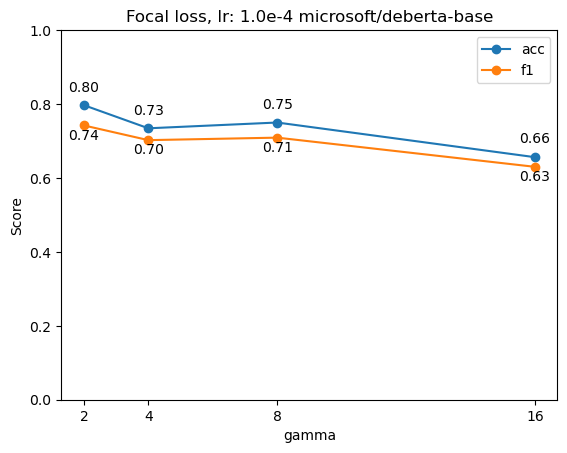

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='g', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["g"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["g"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['g'], [val for val in df['g']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, lr: 1.0e-4 {model_checkpoint}')